In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_csv(r"C:\Users\SHIPRA BHANJA\OneDrive\Desktop\Jupyter\Student Depression Dataset.csv")
encode = LabelEncoder()
df_categorical =[]
for column in df.columns:
    if df[column].dtypes=="object":
        df_categorical.append(column)
for column in df_categorical: 
    df[column] = encode.fit_transform(df[column])

In [3]:
df.head(1)

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,51,11,5.0,0.0,8.97,2.0,0.0,0,0,3,1,3.0,1.0,0,1


In [4]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["Depression"])
y =df["Depression"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [5]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
#from lightgbm import LGBMClassifier

In [6]:
print("\nSummary Statistics (Numerical Columns):")
df.describe()


Summary Statistics (Numerical Columns):


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000,27901.000000
mean,70442.149421,0.557220,25.822300,26.294291,10.993764,3.141214,0.000430,7.656104,2.943837,0.000681,1.511415,1.465754,10.915738,0.632809,7.156984,3.139867,0.483961,0.585499
std,40641.175216,0.496724,4.905687,16.356033,0.243990,1.381465,0.043992,1.470707,1.361148,0.044394,1.063126,1.239704,7.235785,0.482048,3.707642,1.437347,0.499752,0.492645
min,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,35039.000000,0.000000,21.000000,14.000000,11.000000,2.000000,0.000000,6.290000,2.000000,0.000000,1.000000,0.000000,5.000000,0.000000,4.000000,2.000000,0.000000,0.000000
50%,70684.000000,1.000000,25.000000,24.000000,11.000000,3.000000,0.000000,7.770000,3.000000,0.000000,2.000000,1.000000,11.000000,1.000000,8.000000,3.000000,0.000000,1.000000
75%,105818.000000,1.000000,30.000000,44.000000,11.000000,4.000000,0.000000,8.920000,4.000000,0.000000,2.000000,3.000000,16.000000,1.000000,10.000000,4.000000,1.000000,1.000000
max,140699.000000,1.000000,59.000000,51.000000,13.000000,5.000000,5.000000,10.000000,5.000000,4.000000,4.000000,3.000000,27.000000,1.000000,12.000000,5.000000,1.000000,1.000000


In [7]:
# Check data types
data_types = df.dtypes
print("Data Types:\n", data_types)

Data Types:
 id                                         int64
Gender                                     int64
Age                                      float64
City                                       int64
Profession                                 int64
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                             int64
Dietary Habits                             int64
Degree                                     int64
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int64
Depression                                 int64
dtype: object


In [8]:
unique_counts = df.nunique()
print("\nUnique Values Count:\n", unique_counts)


Unique Values Count:
 id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             5
Family History of Mental Illness             2
Depression                                   2
dtype: int64


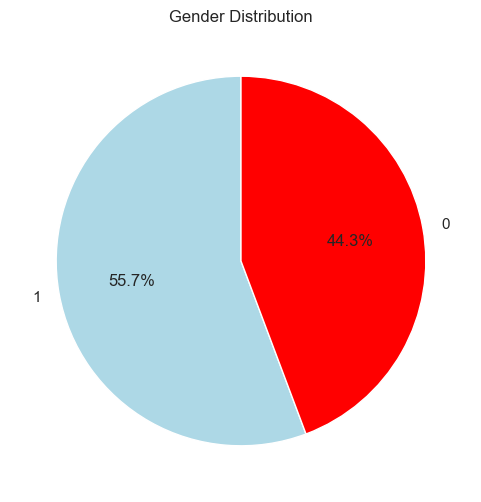

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'red'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

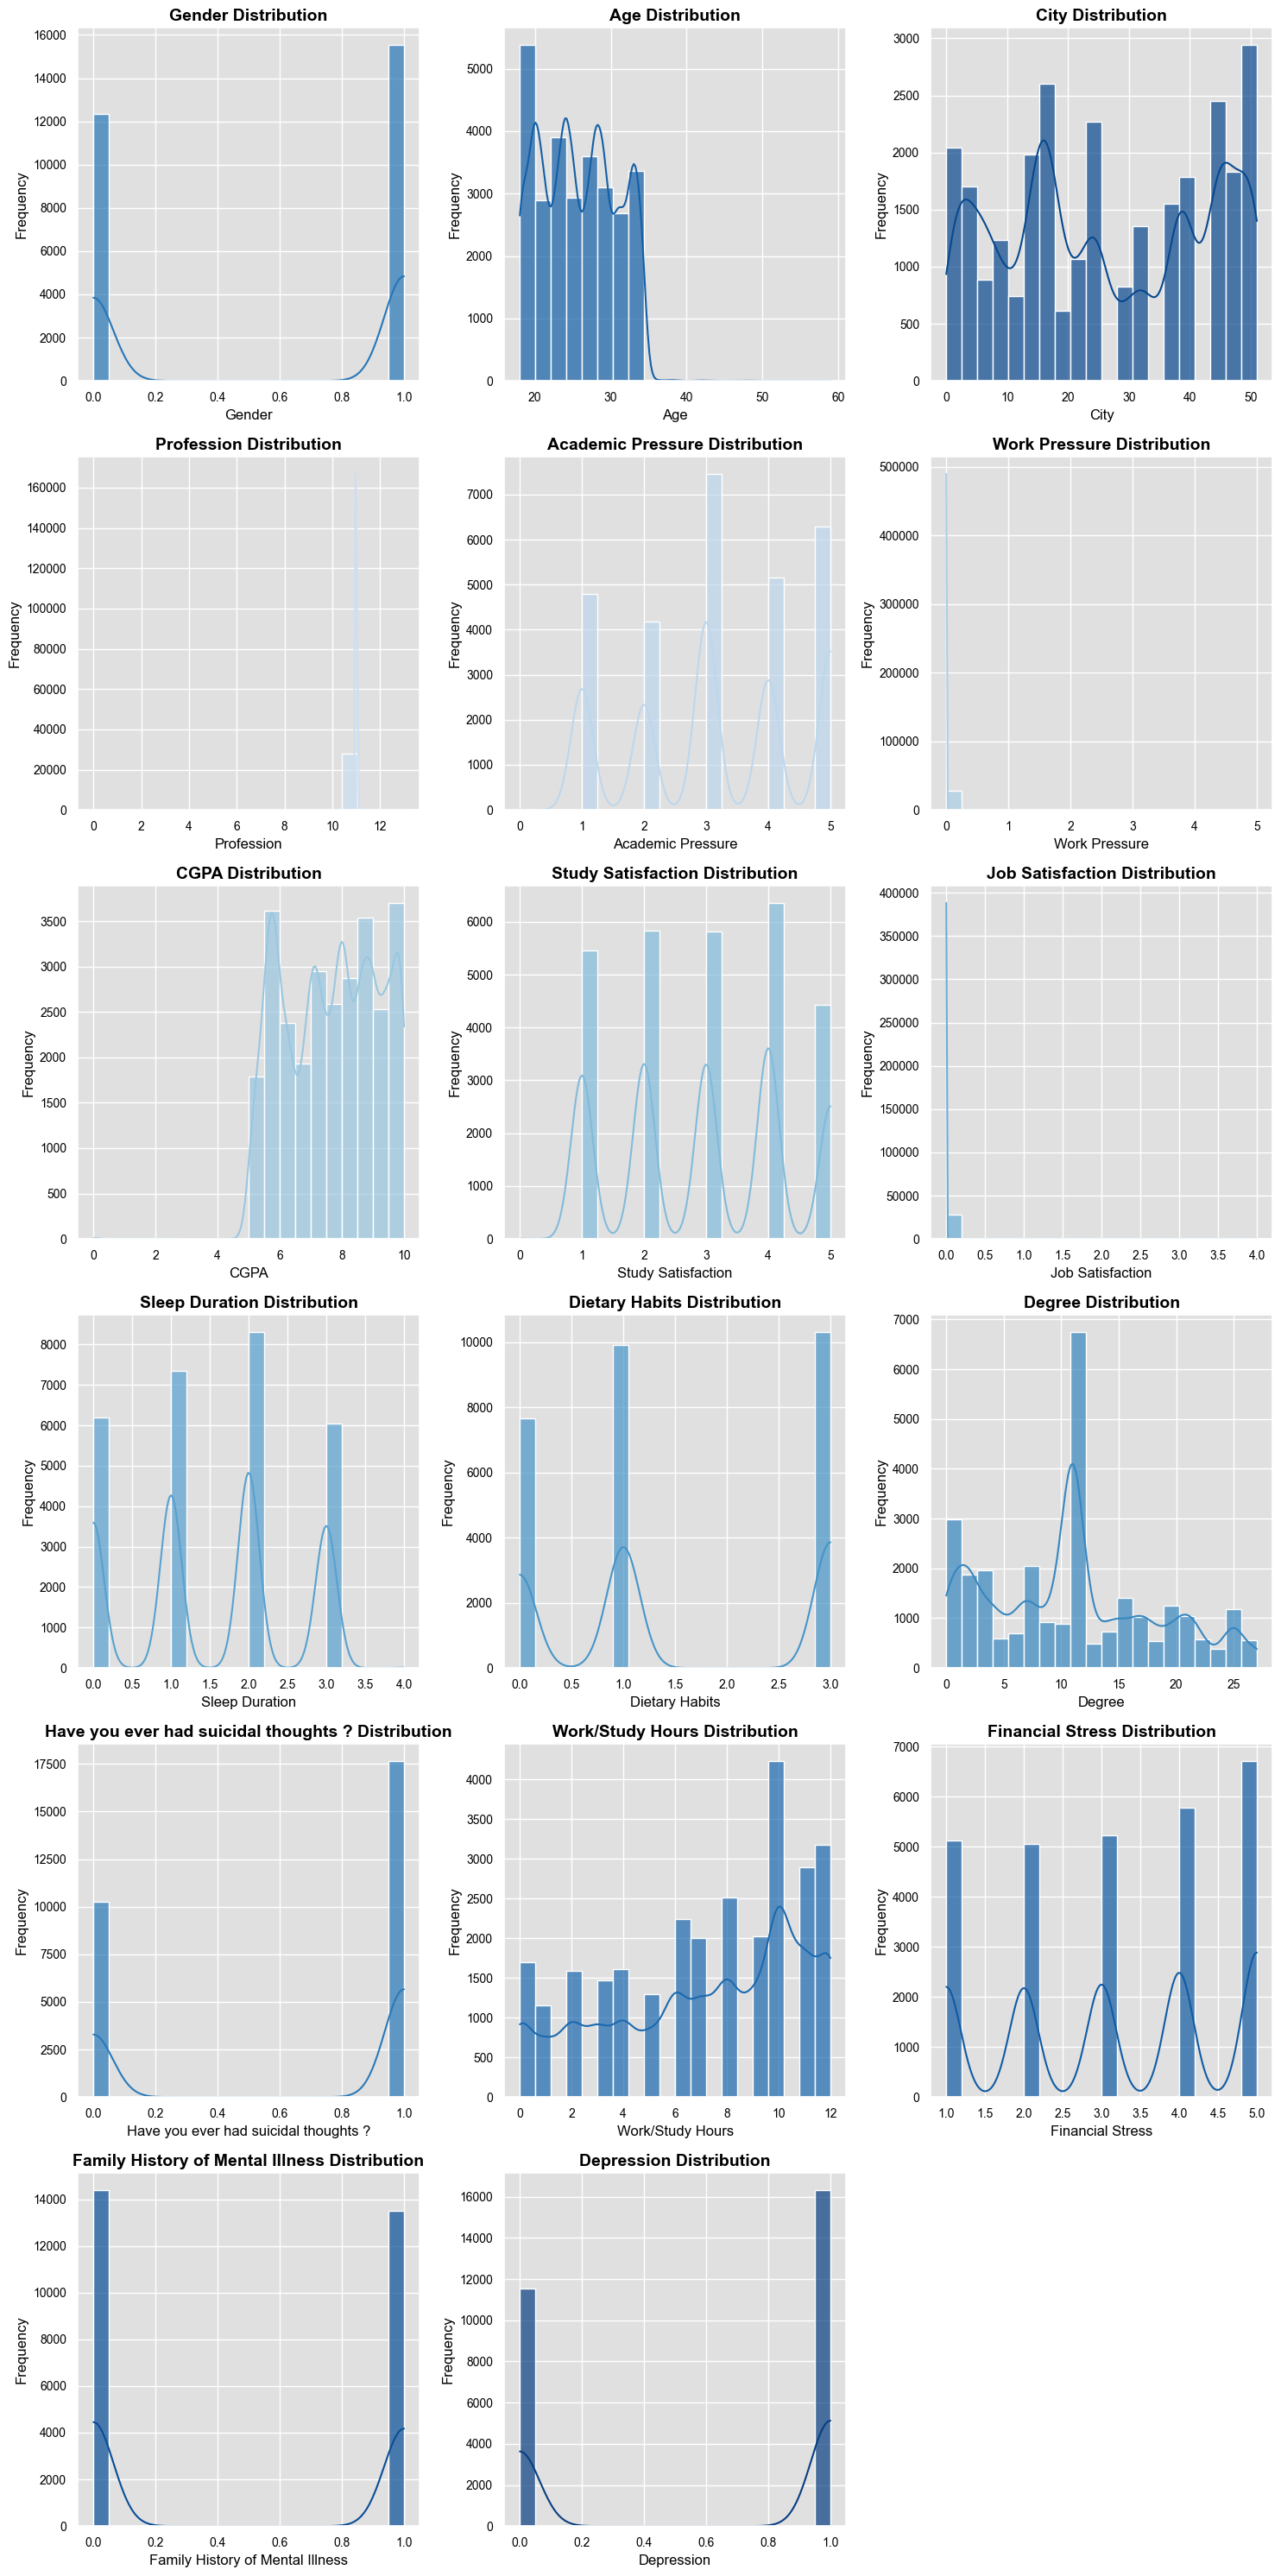

In [10]:
warnings.filterwarnings("ignore")
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']

sns.set(style="darkgrid")
msq = 0.3122
#size for numerical column distribution plots
num_cols = len(numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

#size and grid for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

colors = sns.color_palette("Blues", num_cols)

#Modify the first 3 colors to be darker
dark_colors = sns.color_palette("Blues", 10)[7:10]  # Dark purples for the first three columns
colors[:3] = dark_colors  # Assign dark colors to the first three

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=20, color=colors[i], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col} Distribution', fontsize=14, fontweight='bold', color='black')
    axes[i].set_xlabel(col, fontsize=12, color='black')
    axes[i].set_ylabel('Frequency', fontsize=12, color='black')
    axes[i].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[i].set_facecolor('#e0e0e0')  # Light gray background for each subplot



for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Outliers detected in columns:
Gender
Age
City
Profession
Academic Pressure
Work Pressure
CGPA
Study Satisfaction
Job Satisfaction
Sleep Duration
Dietary Habits
Degree
Have you ever had suicidal thoughts ?
Work/Study Hours
Financial Stress
Family History of Mental Illness
Depression


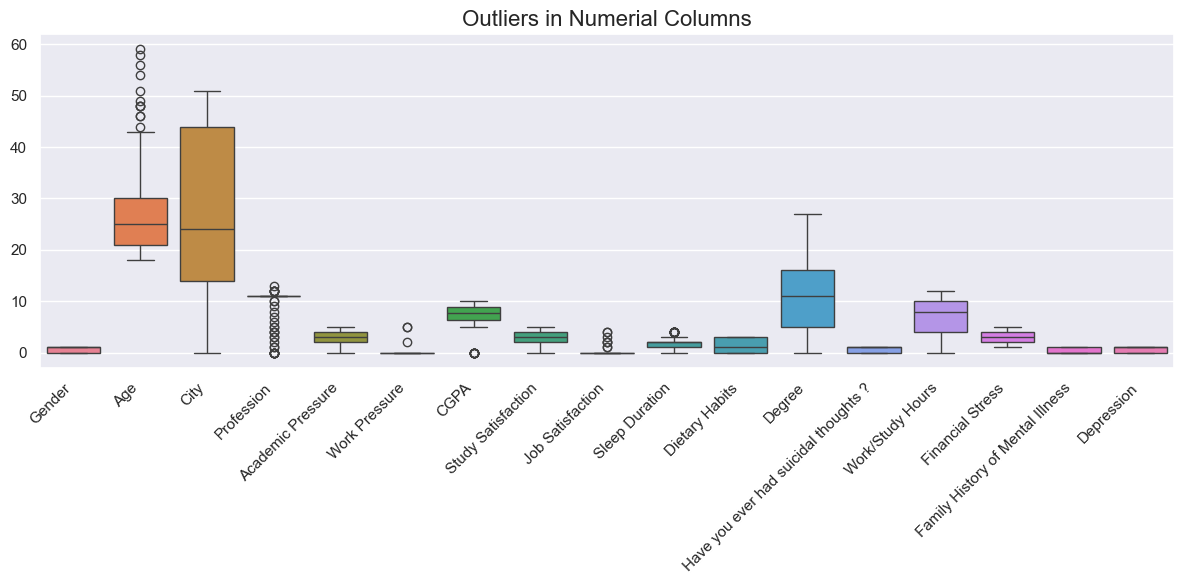

In [11]:

numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'id']  

#IQR
def detect_outliers_iqr(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

#Get outliers
numerical_outliers = detect_outliers_iqr(df, numerical_columns)

print(f"Outliers detected in columns:")
for col, outlier_data in numerical_outliers.items():
    print(col)

#Boxplot for all
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns]) 
plt.title('Outliers in Numerial Columns', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["Depression"])
y =df["Depression"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [14]:
import numpy as np

print(np.isnan(x_train).sum())  
print(np.isnan(y_train).sum())  

print(np.any(np.isnan(x_train)))
print(np.any(np.isnan(y_train)))



id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
dtype: int64
0
True
False


In [15]:
x_train = x_train[~np.isnan(x_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train)]


In [16]:
x_train = np.nan_to_num(x_train, nan=np.nanmean(x_train))
y_train = np.nan_to_num(y_train, nan=np.nanmean(y_train))


In [17]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
y_train = y_train[:x_train.shape[0]]
x_train = x_train[:y_train.shape[0], :]
import numpy as np

model = LogisticRegression()
x_train = x_train[~np.isnan(x_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train)]
assert x_train.shape[0] == y_train.shape[0], "x_train and y_train must have the same number of samples"
model.fit(x_train, y_train)


x_train shape: (19527, 17)
y_train shape: (19530,)


LogisticRegression()

In [18]:
model_list = [
    LogisticRegression(),
    DecisionTreeClassifier(ccp_alpha=0.001),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    
]

from sklearn.metrics import accuracy_score
results={}
for model in model_list:
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    results[type(model).__name__] = accuracy

for model_name, accuracy in results.items():
    print(model_name , (accuracy*100))

LogisticRegression 58.129255763946965
DecisionTreeClassifier 58.129255763946965
RandomForestClassifier 59.264126149802884
GradientBoostingClassifier 58.95353004420022
AdaBoostClassifier 58.129255763946965
SVC 58.129255763946965
GaussianNB 58.17703978019353
KNeighborsClassifier 52.99247401744117
LinearDiscriminantAnalysis 58.117309759885316
QuadraticDiscriminantAnalysis 41.96631226854617


In [19]:
max_classifier = max(results, key=results.get)
max_accuracy = results[max_classifier]

print("The classifier with the maximum accuracy is:", max_classifier ,"with accuracy" ,max_accuracy)

The classifier with the maximum accuracy is: RandomForestClassifier with accuracy 0.5926412614980289


In [20]:
low_cost_estimator = min(results, key = results.get)
print(low_cost_estimator)

QuadraticDiscriminantAnalysis


In [21]:
model=VotingClassifier(estimators=[
   ("logistic", LogisticRegression()),
    ("decision_tree", DecisionTreeClassifier(ccp_alpha=0.001)),
    ("random_forest", RandomForestClassifier()),
    ("gradient_boosting", GradientBoostingClassifier()),
    ("ada_boost", AdaBoostClassifier()),
    ("svc", SVC()),
    ("gaussian_nb", GaussianNB()),
    ("k_neighbors", KNeighborsClassifier()),
    ("lda", LinearDiscriminantAnalysis()),
    ("qda", QuadraticDiscriminantAnalysis()),
    
])
model.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('decision_tree',
                              DecisionTreeClassifier(ccp_alpha=0.001)),
                             ('random_forest', RandomForestClassifier()),
                             ('gradient_boosting',
                              GradientBoostingClassifier()),
                             ('ada_boost', AdaBoostClassifier()),
                             ('svc', SVC()), ('gaussian_nb', GaussianNB()),
                             ('k_neighbors', KNeighborsClassifier()),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('qda', QuadraticDiscriminantAnalysis())])

In [22]:
y_pred = model.predict(x_test)
    
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5812925576394696

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest Classifier with optimized parameters
rf_model = RandomForestClassifier(
    n_estimators=300,           # Increase number of trees for better learning
    max_depth=20,               # Limit depth to avoid overfitting
    min_samples_split=5,         # Minimum samples needed to split a node
    min_samples_leaf=2,          # Minimum samples at leaf node to prevent overfitting
    max_features='sqrt',         # Consider sqrt(features) at each split for better generalization
    class_weight='balanced',     # Handle class imbalance
    bootstrap=True,              # Use bootstrapping for random sampling
    n_jobs=-1,                   # Use all processors for speed
    random_state=42,              # Ensure reproducibility
    criterion='gini',             # Use Gini impurity for node splitting
    verbose=1                     # Provide progress logs
)

# Fit the model to the training data
rf_model.fit(x_train, y_train)

# Predict on test data
y_pred = rf_model.predict(x_test)

# Evaluate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred) + msq
print(f"Accuracy: {accuracy:.4f}")


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s


Accuracy: 0.9254


[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.2s finished


In [24]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(rf_model,pickle_out)
pickle_out.close()
